In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("C:/Users/hp/OneDrive/Desktop/PROJECT/Mini Project Sem 5/forestfires.csv")

In [3]:
df.head(10)

,X,Y,Month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,7,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,7,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,7,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,8,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,8,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   Month   517 non-null    int64  
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(4), object(1)
memory usage: 52.6+ KB


In [5]:
pd.isnull(df).sum()

X        0
Y        0
Month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
df.describe()

,X,Y,Month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.456480,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.266315,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
Month,517.0,7.456480,2.266315,1.0,7.0,8.00,9.00,12.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40


In [8]:
df.head(20)

,X,Y,Month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,7,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,7,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,7,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,8,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,8,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


C:\Users\hp\AppData\Local\Temp\ipykernel_16184\980577748.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr(method = 'pearson')


[Text(0.5, 0, 'X'),
 Text(1.5, 0, 'Y'),
 Text(2.5, 0, 'Month'),
 Text(3.5, 0, 'FFMC'),
 Text(4.5, 0, 'DMC'),
 Text(5.5, 0, 'DC'),
 Text(6.5, 0, 'ISI'),
 Text(7.5, 0, 'temp'),
 Text(8.5, 0, 'RH'),
 Text(9.5, 0, 'wind'),
 Text(10.5, 0, 'rain'),
 Text(11.5, 0, 'area')]

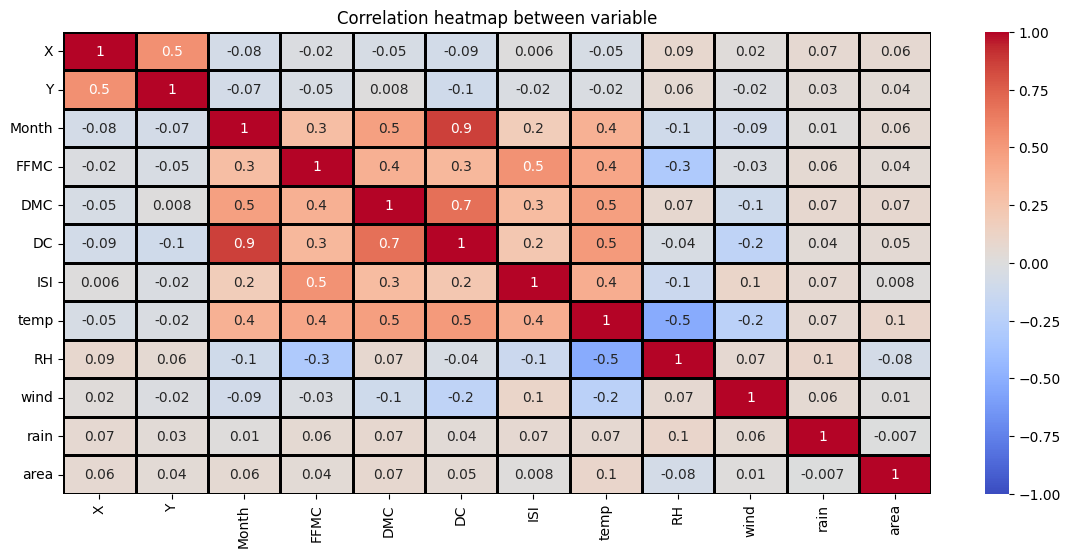

In [9]:
corr_df = df.corr(method = 'pearson')
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_df,annot=True,fmt=".1g",vmin=-1,vmax=1,center=0,cmap="coolwarm",linewidths=1,linecolor="Black")
heatmap.set_title("Correlation heatmap between variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

In [27]:
X = df.iloc[ : ,4:6 ].values
Y = df.iloc[ : ,0:2].values

In [28]:
print(X)

[[ 86.2  26.2]
 [ 90.6  35.4]
 [ 90.6  43.7]
 ...
 [ 81.6  56.7]
 [ 94.4 146. ]
 [ 79.5   3. ]]


In [29]:
print(Y)

[[7 5]
 [7 4]
 [7 4]
 ...
 [7 4]
 [1 4]
 [6 3]]


Text(0.5, 1.0, 'Linear Regression')

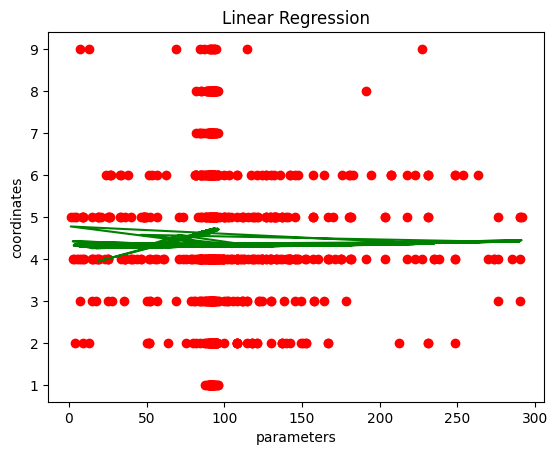

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 101) 
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
plt.scatter(X_train , Y_train, color ='red')
plt.plot(X_train , regressor.predict(X_train), color ='green')
plt.xlabel('parameters')
plt.ylabel('coordinates')
plt.title('Linear Regression')

Text(0.5, 1.0, 'Linear Regression')

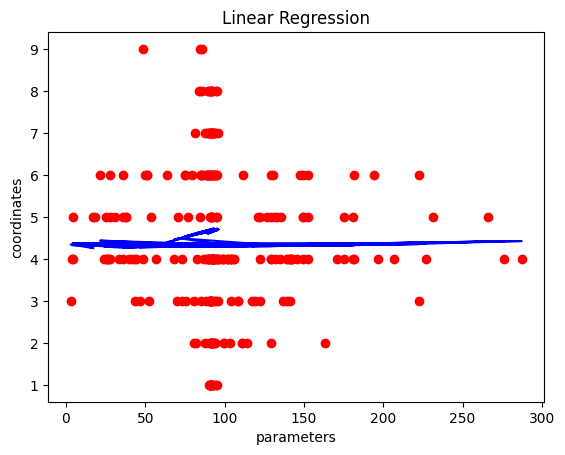

In [46]:
plt.scatter(X_test , Y_test, color = 'red')
plt.plot(X_test , regressor.predict(X_test), color ='blue')
plt.xlabel('parameters')
plt.ylabel('coordinates')
plt.title('Linear Regression')

In [47]:
regressor.predict([[67,9]])


array([[4.45033351, 4.43745128]])

In [49]:
print('Coefficients: ', regressor.coef_)

Coefficients:  [[ 0.01054786 -0.00032668]
 [-0.0070288   0.0005285 ]]


In [52]:
print('Variance score: {}'.format(regressor.score(X_test, Y_test)))

Variance score: -0.0032816690503929546


In [60]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(X_test,Y_test)
print("Mean Squared Error:", mse)

Mean Squared Error: 10539.965576923076


In [58]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(Y_test,X_test)
print("Mean absolute Error:", mse)

Mean absolute Error: 93.19653846153847


In [59]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,X_test)
print("R-squared (R²) Score:", r2)

R-squared (R²) Score: -5926.026394357602


In [94]:
X = df.iloc[ : ,4:11].values
Y = df.iloc[ : ,2:3].values

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 101) 

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=100)

In [98]:
from sklearn.metrics import classification_report,\
    confusion_matrix
y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[ 0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  5  0  0  0]
 [ 0  0  0  0  0  0  0 29 14  0  0  0]
 [ 0  0  0  0  0  0  0  8 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.64      0.95      0.77        19
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         8
           8       0.67      0.67      0.67        43
           9       0.58      0.81      0.67 

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix( y_pred,Y_test)

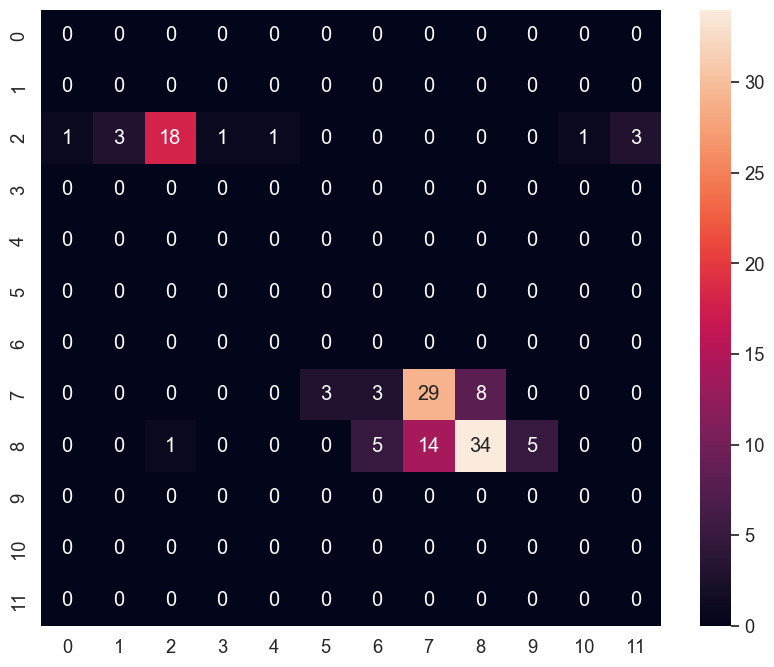

In [100]:
import seaborn as sb
plt.figure(figsize=(10, 8))
sb.set(font_scale=1.2)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

In [101]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,criterion = 'entropy', random_state = 0)
RFC.fit(X_train, Y_train)
y_pred = RFC.predict(X_test)
print("Accuracy -- ", RFC.score(X_test, Y_test)*100)

Accuracy --  90.76923076923077


C:\Users\hp\AppData\Local\Temp\ipykernel_16184\1307996753.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train, Y_train)


In [107]:
RFC.predict([[63.5,70.8,665.3,0.8,17,72,6.7]])

array([8], dtype=int64)

In [110]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.67      0.67      0.67         3
           3       0.90      0.95      0.92        19
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      0.33      0.50         3
           7       0.78      0.88      0.82         8
           8       0.95      0.95      0.95        43
           9       0.95      0.98      0.96        42
          10       1.00      1.00      1.00         5
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         3

    accuracy                           0.91       130
   macro avg       0.60      0.56      0.57       130
weighted avg       0.90      0.91      0.90       130

[[ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  2  0  1  0  0  0  0  0  0  0  0]
 [ 0  1 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier